In [13]:
from RestrictedBoltzmanMachine import RestrictedBoltzmanMachine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
recipes = pd.DataFrame.from_csv('Recipes_with_origin.csv')
recipes.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,armagnac,apricot,artemisia,artichoke,...,EastAsian,EasternEuropean,LatinAmerican,MiddleEastern,NorthAmerican,NorthernEuropean,SouthAsian,SoutheastAsian,SouthernEuropean,WesternEuropean
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ingredients = recipes.columns[:-11]
countries = recipes.columns[-11:]

In [40]:
rbm = RestrictedBoltzmanMachine(392, 100)

In [41]:
error = rbm.train_stochastic_gradient_ascent(recipes.values, learning_rate=0.05,
                                                 iterations=10, minibatch_size=20,
                                                 sampling_steps=1)

In [42]:
error += rbm.train_stochastic_gradient_ascent(recipes.values, learning_rate=0.01,
                                                 iterations=10, minibatch_size=20,
                                                 sampling_steps=1)

In [43]:
error += rbm.train_stochastic_gradient_ascent(recipes.values, learning_rate=0.01,
                                                 iterations=10, minibatch_size=20,
                                                 sampling_steps=1)

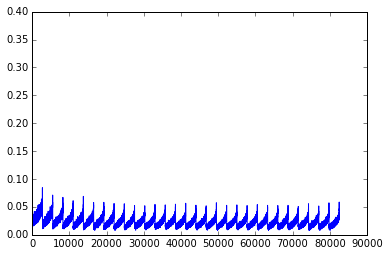

In [44]:
plt.plot(error)

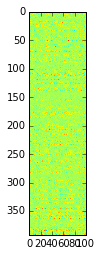

In [45]:
plt.imshow(rbm._weights, interpolation='nearest')

In [39]:
sample_recipes = rbm.sample_fantasies(np.random.binomial(1, 0.5, (5, 392)), 1)[0]
for binary_vector in sample_recipes:
    print [ingr for ingr, ind in zip(recipes.columns, binary_vector) if ind == 1]

['angelica', 'apple_brandy', 'apricot', 'artemisia', 'baked_potato', 'balm', 'bartlett_pear', 'beet', 'bitter_orange', 'black_mustard_seed_oil', 'black_raspberry', 'black_sesame_seed', 'brassica', 'cabernet_sauvignon_wine', 'camembert_cheese', 'carob', 'champagne_wine', 'chayote', 'chicory', 'citrus', 'clam', 'cod', 'emmental_cheese', 'fig', 'fruit', 'gardenia', 'grape', 'green_tea', 'hop', 'horseradish', 'huckleberry', 'japanese_plum', 'jasmine', 'katsuobushi', 'kumquat', 'lavender', 'lima_bean', 'litchi', 'lobster', 'lovage', 'mandarin_peel', 'mango', 'mate', 'munster_cheese', 'mussel', 'ouzo', 'palm', 'pelargonium', 'pimenta', 'port_wine', 'potato_chip', 'prickly_pear', 'provolone_cheese', 'raw_beef', 'red_bean', 'roasted_almond', 'roasted_hazelnut', 'roasted_meat', 'roquefort_cheese', 'rose', 'scallop', 'sherry', 'shiitake', 'soybean_oil', 'star_anise', 'strawberry_juice', 'sunflower_oil', 'turnip', 'wasabi', 'watercress', 'whiskey']
['angelica', 'anise_seed', 'apple_brandy', 'arte

In [30]:
rbm._bias_visible

array([[-4.92238987],
       [-0.74057023],
       [-1.40626019],
       [-0.53904851],
       [-4.39546984],
       [-0.58036806],
       [-2.37388302],
       [-0.65569425],
       [-0.63110883],
       [-2.46526564],
       [-2.28400138],
       [-2.01196681],
       [-4.26025442],
       [-0.61366162],
       [-0.67961003],
       [-3.27612518],
       [-1.10088082],
       [-0.65355835],
       [-4.19546721],
       [-3.1674937 ],
       [-3.93939153],
       [-0.75662949],
       [-5.67988774],
       [-2.6489738 ],
       [-0.78117096],
       [-1.55283976],
       [-1.3253008 ],
       [-6.66629391],
       [-0.83104646],
       [-0.90679634],
       [-0.66371229],
       [-2.26412055],
       [-0.63248257],
       [-0.60828188],
       [-6.45007316],
       [-0.7206315 ],
       [-0.69892261],
       [-0.45584596],
       [-1.06435435],
       [-0.69444653],
       [-2.14375536],
       [-2.23242198],
       [-0.70356053],
       [-1.03551958],
       [-1.21357739],
       [-0